In [1]:
import os,sys
import csv
import copy

from IPython.display import Math
from IPython.display import Latex
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from scipy.integrate import simps, trapz

sys.path.append("/home/pgrover/Dropbox/PhD/Morphodynamic_Model/pymorph")
from weno import WENO,ENO
from weno import get_stencil

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
nx = 81
dx = 2./(nx-1)
x = np.linspace(0,2,nx)
nt = 25    
dt = .02  
c = 1.      #assume wavespeed of c = 1
u = np.zeros(nx)      #numpy function ones()
u[.5/dx : 1/dx+1]=2  #setting u = 2 between 0.5 and 1 as per our I.C.s
k = 3 # number of weights Order= 2*k-1
gc = k-1 #number of ghost cells 
#adding ghost cells 
gcr=x[-1]+np.linspace(1,gc,gc)*dx
gcl=x[0]+np.linspace(-gc,-1,gc)*dx
xc = np.append(x,gcr)
xc = np.append(gcl,xc)
uc = np.append(u,u[-gc:])
uc = np.append(u[0:gc],uc)

print(len(xc))


85


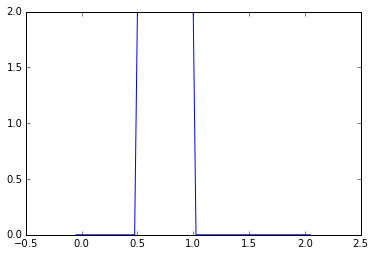

In [3]:
plt.plot(xc,uc)

In [6]:
for n in range(1,nt):  
    un = uc.copy() 
    for i in range(1,nx): 
        print(i,k,n)
        xloc = xc[i-(k-1):i+k]
        
        # this is the problem line:
        # floc = c*uc[i-(k-1):i+k] 
        print(i-(k-1),i+k)
        uc_stencil = get_stencil(uc,i-(k-1),i+k)
        print('stencil {0}'.format(uc_stencil))
        print(uc_stencil)
        floc = c*uc_stencil
        

        #f_left,f_right = ENO(xloc,floc,k)
        f_left,f_right = WENO(xloc,floc,k)        
        uc[i] = un[i]-dt/dx*(f_right-f_left)

(1, 3, 1)
(-1, 4)
stencil [ 0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.]


IndexError: index 5 is out of bounds for axis 0 with size 5

In [7]:
floc

array([ 0.,  0.,  0.,  0.,  0.])

In [8]:
k-r+i-1

NameError: name 'r' is not defined

In [9]:
gs = np.zeros((nx+2*gc,nt))
flux = np.zeros(nx+2*gc)

for n in range(1,nt):  
    un = uc.copy() 
    for i in range(gc,nx-1+gc): #i=2
        xloc = xc[i-(k-1):i+k] #i+k-1-(i-(k-1)-1) = 2k -1 
        uloc = uc[i-(k-1):i+k]
        f_left,f_right = ENO(xloc,uloc,k)
        #f_left,f_right = WENO(xloc,uloc,k)
        #upwind flux
        flux[i]=0.5*(c+abs(c))*f_left + 0.5*(c-abs(c))*f_right

    for i in range(gc,nx-gc):
        if c>0:
            uc[i] = un[i]-dt/dx*(flux[i]-flux[i-1])
        else:
            uc[i] = un[i]-dt/dx*(flux[i+1]-flux[i])

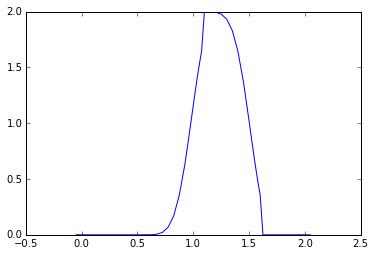

In [10]:
plt.plot(xc,uc)

In [48]:
gc

2

In [54]:
print sample_list[-1:2]

[]


In [56]:
sample_list[-2:2:-1]

[6, 5, 4]

In [59]:
sample_list

[1, 2, 3, 4, 5, 6, 7]

In [68]:
sample_list[-3:]

[5, 6, 7]

In [69]:
a = [0,1,2,3,4,5,6,7,8,9]

In [70]:
a[-2:]

[8, 9]

In [72]:
a[0:2]

[0, 1]

In [73]:
a[0:4]

[0, 1, 2, 3]

In [74]:
a[-1:]

[9]

In [75]:
a[0:3]

[0, 1, 2]